# Word cloud

In [1]:
import nltk     # Natural Language ToolKit

In [2]:
# Punkt, Stopwords 다운로드

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

- Wordcloud  설치: conda install -c conda-forge wordcloud

In [4]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

### Alice in Wonderland

In [6]:
with open('data/Alice.txt') as file:
    text = file.read()

In [8]:
# Stopwords

stopwords = STOPWORDS
len(stopwords)

192

In [9]:
# Stopwords에 'said'추가
stopwords.add('said')

In [11]:
wc = WordCloud(background_color='white', max_words=2000, stopwords=stopwords)
wc = wc.generate(text)

In [12]:
keys = list(wc.words_.keys())
values = list(wc.words_.values())
for i in range(10):
    print(f'{keys[i]}:{values[i]}')

Alice:1.0
little:0.29508196721311475
one:0.27595628415300544
know:0.2459016393442623
went:0.226775956284153
thing:0.2185792349726776
time:0.2103825136612022
Queen:0.20765027322404372
see:0.1830601092896175
King:0.17486338797814208


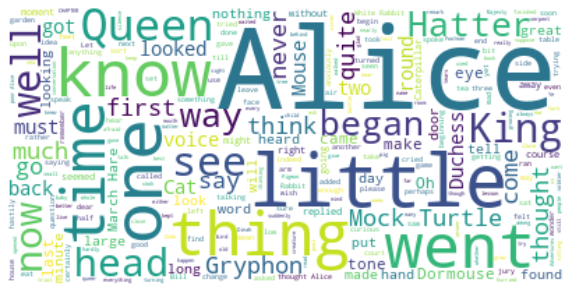

In [15]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

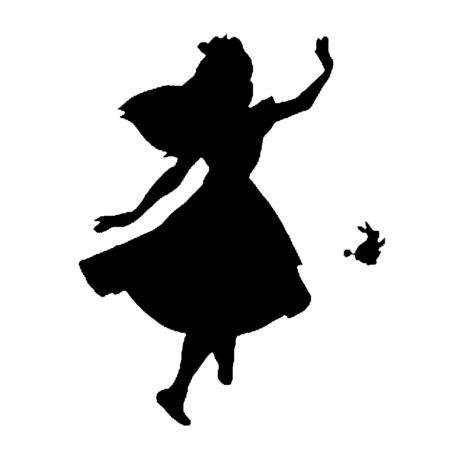

In [16]:
# 그림위에 표시하기

mask = np.array(Image.open('data/Alice_mask.png'))
plt.figure(figsize=(8,8))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

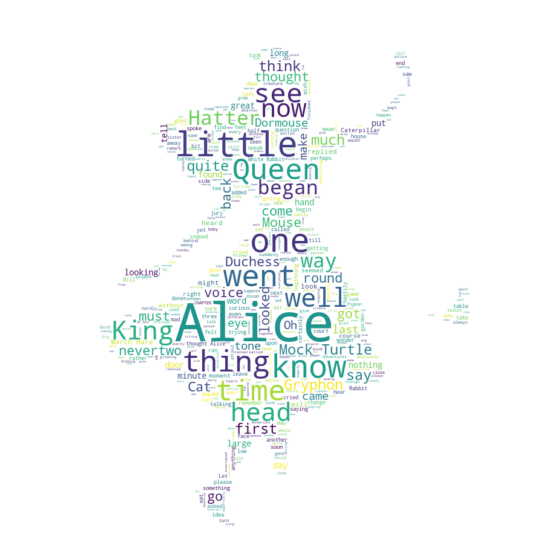

In [18]:
wc = WordCloud(background_color='white', max_words=2000, 
                mask=mask, stopwords=stopwords)
wc = wc.generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Star Wars - A New Hope

In [19]:
with open('data/A_new_hope.txt') as file:
    text = file.read()
text = text.replace('HAN', 'Han').replace("LUKE'S", "Luke")
mask = np.array(Image.open('data/Stormtrooper_mask.png'))

In [20]:
stopwords = STOPWORDS
stopwords.add('int')
stopwords.add('ext')

In [22]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords,
                margin=10, random_state=1).generate(text)
default_colors = wc.to_array()

In [23]:
# HSL(Hue, Satuation, Lightness)코드로 변환

def grey_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return f'hsl(0, 0%, {np.random.randint(212,313)}%)'

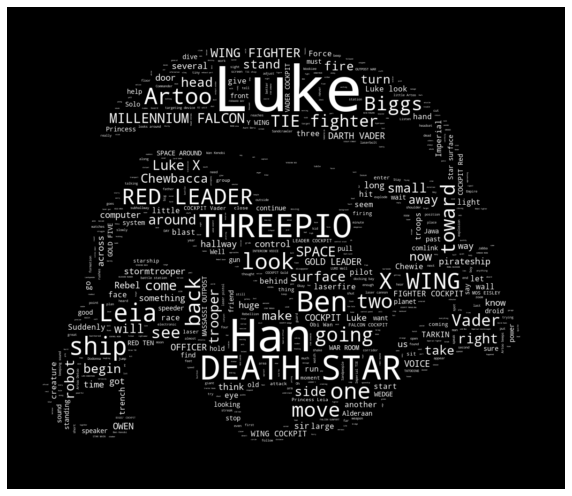

In [24]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=grey_color, random_state=3), interpolation='bilinear')
plt.axis('off')
plt.show()

In [44]:
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(180,240),np.random.randint(40,80),np.random.randint(60,90)))

In [45]:
wc2 = WordCloud(background_color='white', max_words=1000, mask=mask, stopwords=stopwords,
                margin=10, random_state=1).generate(text)
default_colors = wc2.to_array()

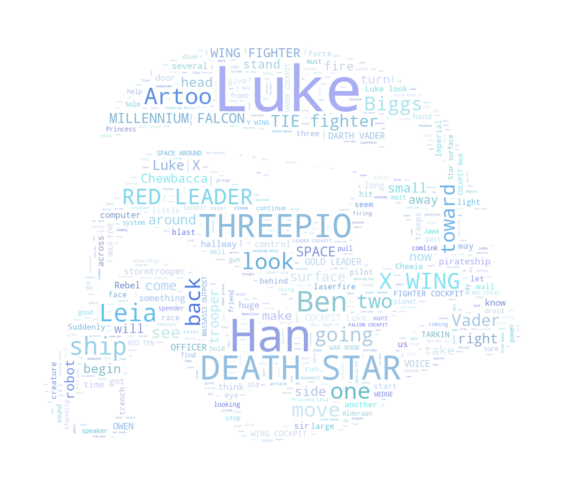

In [46]:
plt.figure(figsize=(10,10))
plt.imshow(wc2.recolor(color_func=color_func, random_state=3), interpolation='bilinear')
plt.axis('off')
plt.show()